In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['sex']=df['sex'].apply(lambda x:1 if x=='male' else 0)
df['smoker'] = df['smoker'].apply(lambda x:1 if x=='yes' else 0)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df.join(pd.get_dummies(df.region,dtype=int)).drop('region',axis=1)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

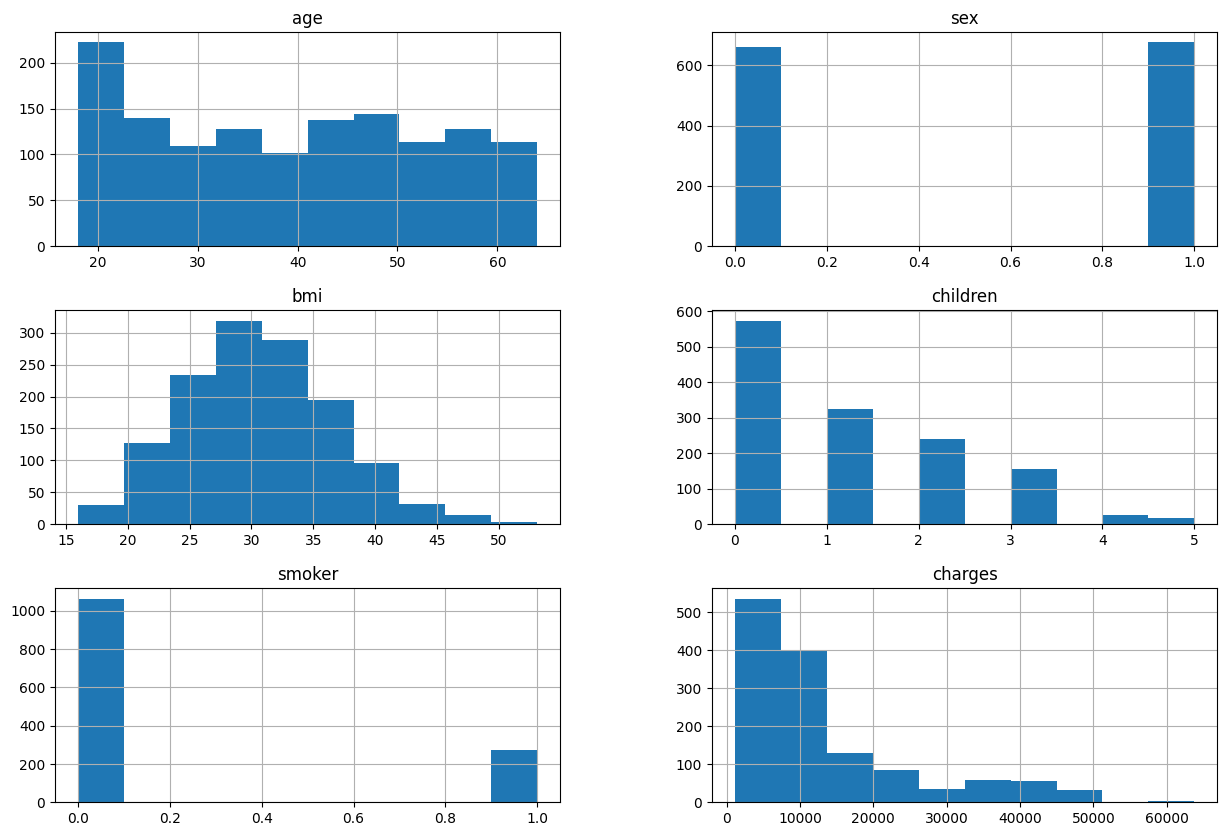

In [ ]:
df.hist(figsize=(15,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Axes: >

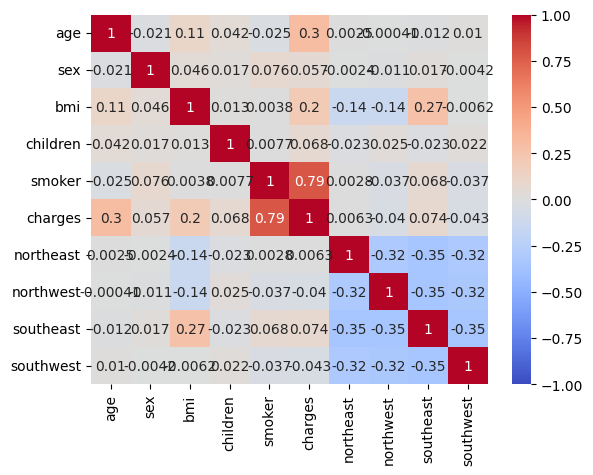

In [ ]:
df_encoded = df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_error
x=df.drop('charges',axis=1)
y=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model = RandomForestRegressor(n_jobs=-1)
x_train_encoded = pd.get_dummies(x_train, columns=['region'], drop_first=True, dtype=int)
model.fit(x_train_encoded, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
x_test_encoded = pd.get_dummies(x_test, columns=['region'], drop_first=True, dtype=int)
model.score(x_test_encoded, y_test)

0.8645227392280108

In [ ]:
y_pred = model.predict(x_test_encoded)
rmse=root_mean_squared_error(y_test,y_pred)

In [ ]:
rmse

4380.090343677387

In [ ]:
df.charges.std()

12110.011236693994

In [ ]:
y_test.std()

11922.343523151845

In [ ]:
df.charges.median()

9382.033

In [ ]:
mae=mean_absolute_error(y_pred,y_test)

In [ ]:
mae

2596.680660493222

Text(0.5, 1.0, 'prediction vs truth')

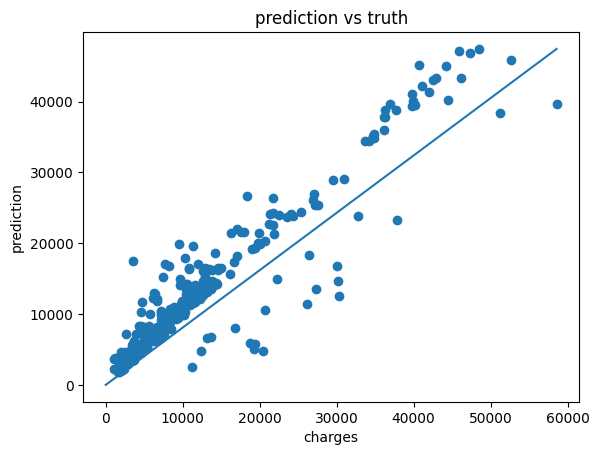

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_pred)))
plt.xlabel('charges')
plt.ylabel('prediction')
plt.title('prediction vs truth')

In [ ]:
feature_importances = sorted(zip(model.feature_names_in_,model.feature_importances_),key=lambda x:x[1],reverse=True)

Text(0.5, 1.0, 'feature importances')

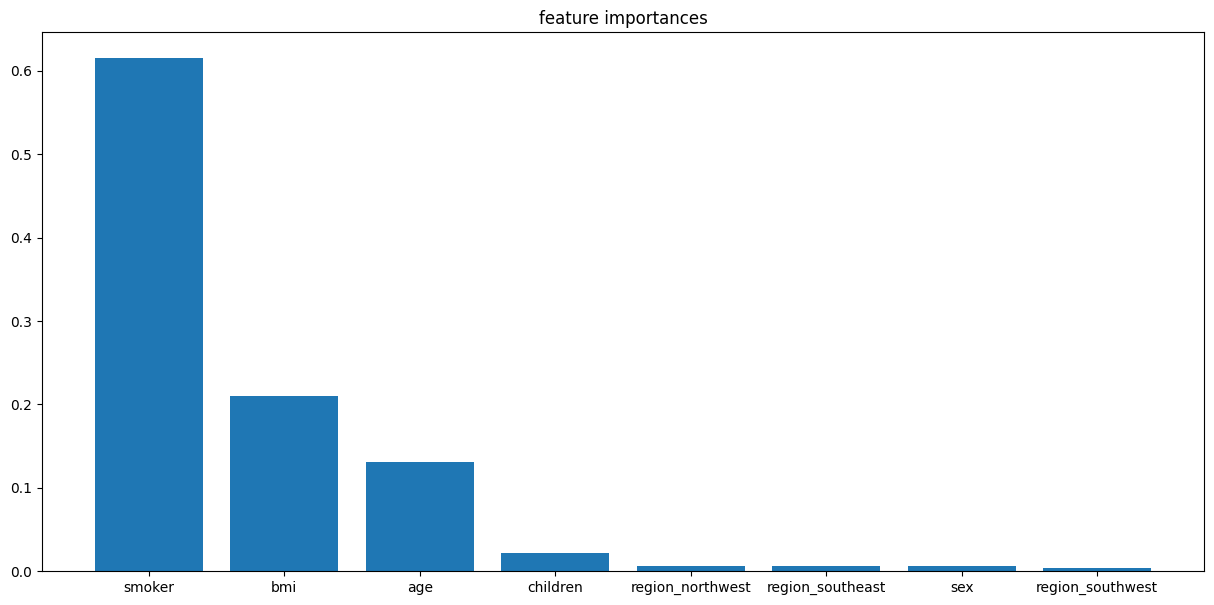

In [ ]:
plt.figure(figsize=(15,7))
plt.bar([x[0] for x in feature_importances],[x[1] for x in feature_importances])
plt.title('feature importances')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None,2,5],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf': [1,2,4,6]
    }
model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x_train_encoded,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_
{ 'max_depth': 5,'min_samples_leaf':4,'min_samples_split':6}

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6}

In [ ]:
grid_search.best_estimator_.score(x_test_encoded,y_test)

0.8917319498874893

In [ ]:
grid_search.best_estimator_.score(x_test_encoded,y_test)

0.8917319498874893

In [ ]:
rmse=root_mean_squared_error(y_test,y_pred)

In [ ]:
rmse

4380.090343677387

In [ ]:
mae=mean_absolute_error(y_pred,y_test)

In [ ]:
mae

2596.680660493222

Text(0.5, 1.0, 'prediction vs truth')

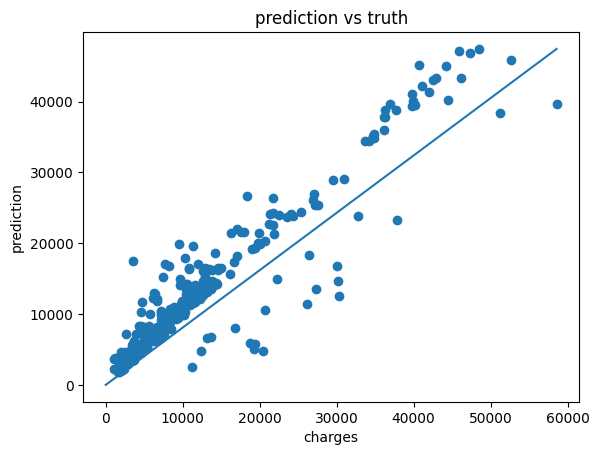

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_pred)))
plt.xlabel('charges')
plt.ylabel('prediction')
plt.title('prediction vs truth')